In [116]:
from pydataset import data
from sklearn import linear_model 
from sklearn.model_selection import train_test_split
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [5]:
reg = linear_model.LinearRegression()


In [74]:
# pima dataset (another form of dataset) 
pima = data('Pima.tr')
pima

,npreg,glu,bp,skin,bmi,ped,age,type
1,5,86,68,28,30.2,0.364,24,No
2,7,195,70,33,25.1,0.163,55,Yes
3,5,77,82,41,35.8,0.156,35,No
4,0,165,76,43,47.9,0.259,26,No
5,0,107,60,25,26.4,0.133,23,No
...,...,...,...,...,...,...,...,...
196,2,141,58,34,25.4,0.699,24,No
197,7,129,68,49,38.5,0.439,43,Yes
198,0,106,70,37,39.4,0.605,22,No
199,1,118,58,36,33.3,0.261,23,No


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


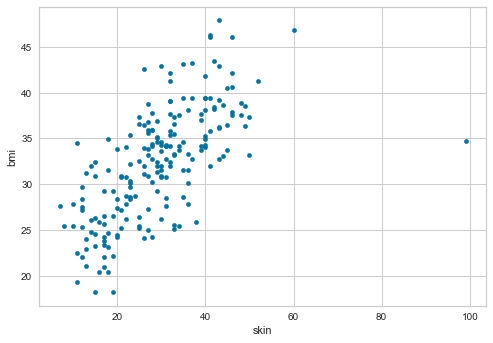

In [75]:
pima.plot(kind= 'scatter', x='skin', y= 'bmi') #using pandas plotting feature 
plt.show()

In [76]:
#test train split for supervised training
x_train, x_test, y_train,y_test = train_test_split(pima.skin,pima.bmi,test_size = 0.35)
#35% training 65% testing


(70,)

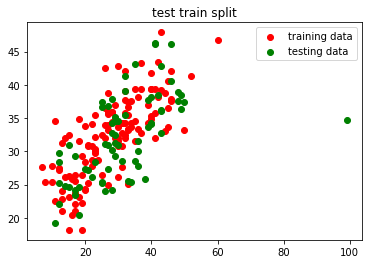

In [34]:
plt.scatter(x_train,y_train,label = 'training data',color = 'r')
plt.scatter(x_test,y_test,label = 'testing data',color = 'g')
plt.legend()
plt.title('test train split')
plt.show()

In [ ]:
#red line is used to create a linear model 
#line will then be tested on everything in the green poriton

In [28]:
#linear model 
lr = linear_model.LinearRegression()
lr.fit(x_train.values.reshape(-1,1),y_train.values) 


LinearRegression()

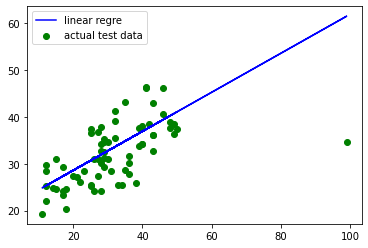

In [35]:
#use model to predict on TEST data 
prediction = lr.predict(x_test.values.reshape(-1,1))
#plot predicted line against actual test data 
plt.plot(x_test, prediction,label = 'linear regre', color = 'b') 
plt.scatter(x_test,y_test, label = 'actual test data', color = 'g')
plt.legend() 
plt.show()

In [32]:
#predict bmi of women with skin fold 50 
lr.predict(np.array([[50]]))

array([41.06306271])

In [36]:
#score this model
lr.score(x_test.values.reshape(-1,1), y_test.values)
#takes actual value and compares it with predicted value (returns R**2)

0.2180378680971965

In [ ]:
#based on vidhya analytics, LR has 6 assumptions 
# Linearlity, Normality,Homoscedasticity, Independence, Normally distributed error temers and no autocorrelation 
# we will attempt to perform this to ensure that our LR assumptions are valid

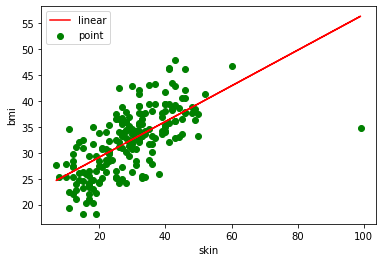

In [43]:
#linearlity 
plt.scatter(pima['skin'],pima['bmi'],color = 'g',label = 'point')
plt.xlabel('skin')
plt.ylabel('bmi')
a,b = np.polyfit(pima.skin,pima.bmi,1)
plt.plot(pima.skin,a*(pima.skin) + b,color = 'r',label = 'linear')
plt.legend()
plt.show()
#based on the graph there is a sense of linearlity 

In [58]:
#testing normality using both noraml distribution & kde 

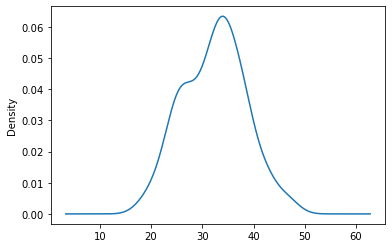

In [57]:
#kernel density estimate of bmi 
pima.bmi.plot.kde()
plt.show()

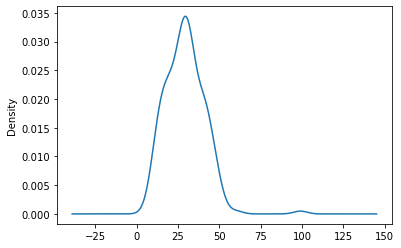

In [53]:
#kde of skin 
pima.skin.plot.kde()
plt.show()

In [71]:
bmi = pima.describe().bmi 
skin = pima.describe().skin 
bmi

count    200.000000
mean      32.310000
std        6.130212
min       18.200000
25%       27.575000
50%       32.800000
75%       36.500000
max       47.900000
Name: bmi, dtype: float64

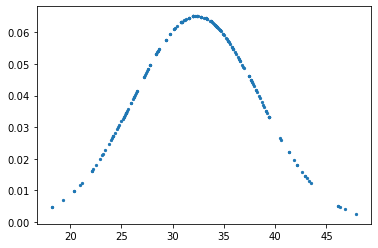

In [80]:
#nd of bmi 
plt.scatter(pima.bmi,stats.norm.pdf(pima.bmi,bmi['mean'],bmi['std']),s=5)
plt.show()

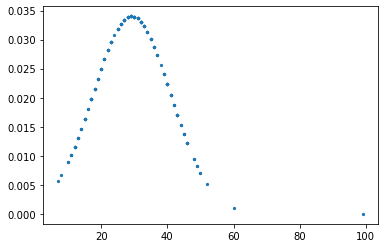

In [82]:
#nd of skin 
plt.scatter(pima.skin,stats.norm.pdf(pima.skin,skin['mean'],skin['std']), s = 5)
plt.show()

In [ ]:
#please remember to do residual plot , vif/correlation matrix score &  durbin watson test 


In [ ]:
#residual plotting 


In [81]:
x_train = x_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

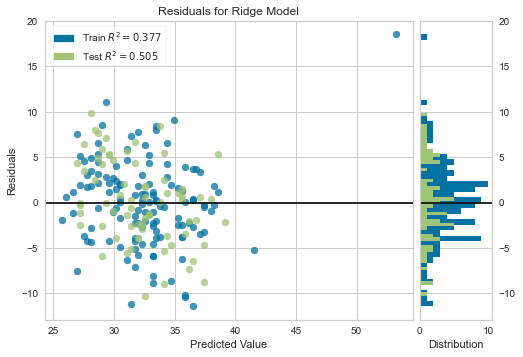

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [127]:
# DO NOT FUCKING TOUCH THIS IT IS SO IMPORTANT & WAS SUCH A HASTLE TO CODE 
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot
model = Ridge()
visualizer = ResidualsPlot(model,hist =True, qqplot = False) 
visualizer.fit(x_train,y_train)
visualizer.score(x_test, y_test) 
visualizer.show()

### From the Ridge model & QQ Plot it is unevenly distributed. Variance != constant and from 

## NOW WE TEST FOR INDEPENDENCE 

In [105]:
##This utilises the VIF (or variance influence factor graph) and correlation matrix graph 
a = pima.bmi 
b = pima.skin
a = a.values.reshape(-1,1)
b = b.values.reshape(-1,1)


In [114]:
df = pd.DataFrame(a, columns = ['bmi'])
df.insert(1,"skin",b)
corrMatrix = df.corr() 
print(corrMatrix)

           bmi      skin
bmi   1.000000  0.659036
skin  0.659036  1.000000


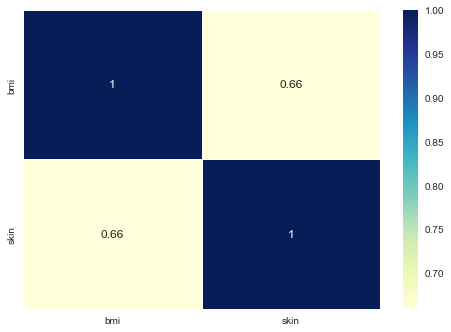

In [118]:
ax =sns.heatmap(corrMatrix, annot = True, linewidth = .5, cmap = "YlGnBu")
#There is some form of correlation (about 66% so they are not independent of one another) 
#This is an issue here. 
# Let us compare with other factors inside the pima dataset
#VIF score > 5 so it is highly correlated :(
#utilises pearson's method of correlation (there is also kendall and spearman)

In [120]:
pimacorr = pima.corr() 
print(pimacorr)

          npreg       glu        bp      skin       bmi       ped       age
npreg  1.000000  0.170525  0.252061  0.109049  0.058336 -0.119473  0.598922
glu    0.170525  1.000000  0.269381  0.217597  0.216790  0.060710  0.343407
bp     0.252061  0.269381  1.000000  0.264963  0.238821 -0.047400  0.391073
skin   0.109049  0.217597  0.264963  1.000000  0.659036  0.095403  0.251926
bmi    0.058336  0.216790  0.238821  0.659036  1.000000  0.190551  0.131920
ped   -0.119473  0.060710 -0.047400  0.095403  0.190551  1.000000 -0.071410
age    0.598922  0.343407  0.391073  0.251926  0.131920 -0.071410  1.000000


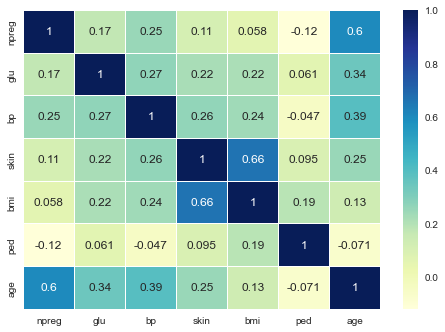

In [122]:
ax = sns.heatmap(pimacorr,annot = True, linewidth = .5, cmap = "YlGnBu")

In [ ]:
#based on the heatmap, ped & npreg have the least collinearlity
